# Plotting the results of the LDPC code simulatoins

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_data(path_fer, path_ps, concats=None, additional_paths=None,
             upper_limit=12, lower_limit=0):
    """
    plots the data in a very simple fer vs p plot
    params:
        - path_fer: location of the file containging the frame error rates
        - path_ps: locatin of the file containing the respective crossover probabilites
        - concats: list of additional data pairs
        - additiona_paths: list of additional file pairs
        - upper limit: plot limit to avoid straight lines of fer of 1
        
    """
    # read in files
    with open(path_fer, 'r') as f:
        fers_str = f.read().splitlines()
    
    with open(path_ps, 'r') as f:
        p_str = f.read().splitlines()
    
    fers = [float(num) for num in fers_str]
    ps = [float(num) for num in p_str]
    
    fers = np.array(fers)
    ps = np.array(ps)
    
    # remove the fer of one, as they are due to finite sample size
    nonzeros = np.nonzero(fers>0)[0]
    fers = fers[nonzeros]
    ps = ps[nonzeros]
    
    # handle additional input data
    if concats:
        np.concatenate([fers,np.array(concats[1])])
        np.concatenate([ps, np.array(concats[0])])
    
    # handle additional input files
    if additional_paths:
        path_fer = additional_paths[0]
        path_ps = additional_paths[1]

        with open(path_fer, 'r') as f:
            fers_str = f.read().splitlines()

        with open(path_ps, 'r') as f:
            p_str = f.read().splitlines()

        _fers = [float(num) for num in fers_str]
        _ps = [float(num) for num in p_str]

        _fers = np.array(_fers)
        _ps = np.array(_ps)

        nonzeros = np.nonzero(_fers>0)[0]
        _fers = _fers[nonzeros]
        _ps = _ps[nonzeros]
        
        np.concatenate([fers,_fers])
        np.concatenate([ps, _ps])
    
    return ps, fers

# Creating the plot for the example codes

In [5]:
path_fer = "results/fer"
path_ps = "results/p"

ps_4096_3, fer_4096_3 = plot_data(path_fer, path_ps)

path_fer2 = "results/fer_detail_4095_738_102"
path_ps2 = "results/p_detail_4095_738_102"

ps_4096_4, fer_4096_4 = plot_data(path_fer2, path_ps2)

path_fer = "results/fer_detail_1908_212_4"
path_ps = "results/p_detail_1908_212_4"

ps_1908, fer_1908 = plot_data(path_fer, path_ps)

path_fer = "results/fer_detail_1908_212_4_big_error"
path_ps = "results/p_detail_1908_212_4_big_error"

with open(path_fer, 'r') as f:
    fers_str = f.read().splitlines()

with open(path_ps, 'r') as f:
    p_str = f.read().splitlines()

fers = [float(num) for num in fers_str]
ps = [float(num) for num in p_str]

ps_1908 = np.concatenate([ps_1908, np.array(ps)])
fer_1908 = np.concatenate([fer_1908, np.array(fers)])

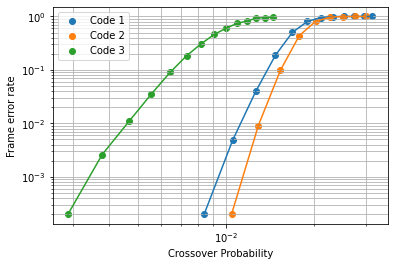

In [6]:
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel("Crossover Probability")
plt.ylabel("Frame error rate")



plt.scatter(ps_4096_3[1:-4], fer_4096_3[1:-4], label="Code 1")
plt.scatter(ps_4096_4, fer_4096_4, label="Code 2")
plt.scatter(ps_1908[1:], fer_1908[1:], label="Code 3")

plt.plot(ps_4096_3[1:-4], fer_4096_3[1:-4])
plt.plot(ps_4096_4, fer_4096_4)
plt.plot(ps_1908[1:], fer_1908[1:])

plt.legend()
plt.savefig("LDPC_fer_plot_sw.png", dpi=300)